Shape (rows, columns): (1460, 81)

First 5 rows:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType

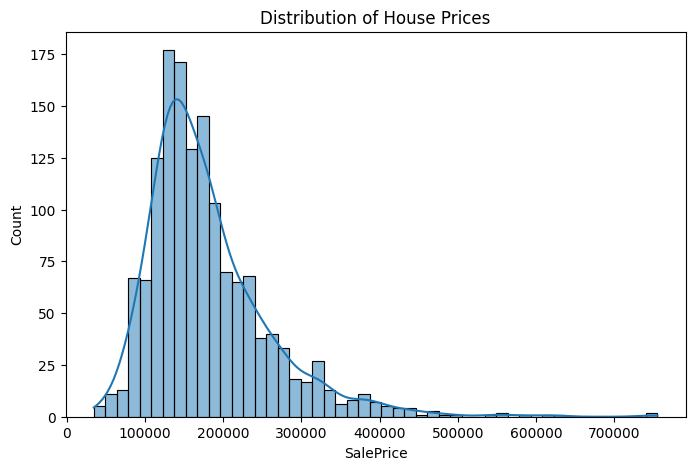


SalePrice stats:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


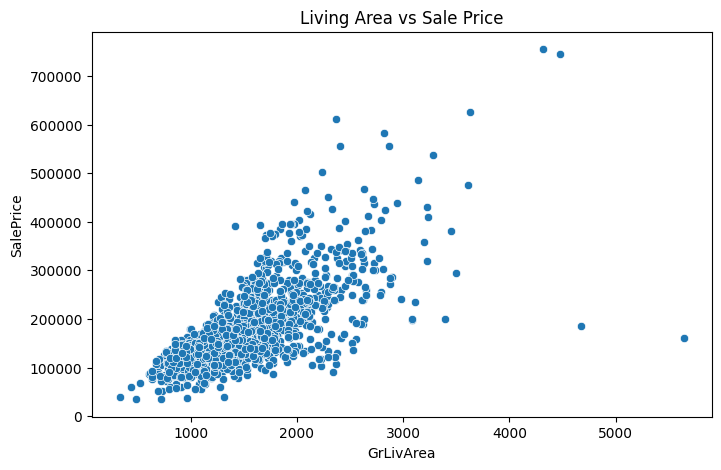

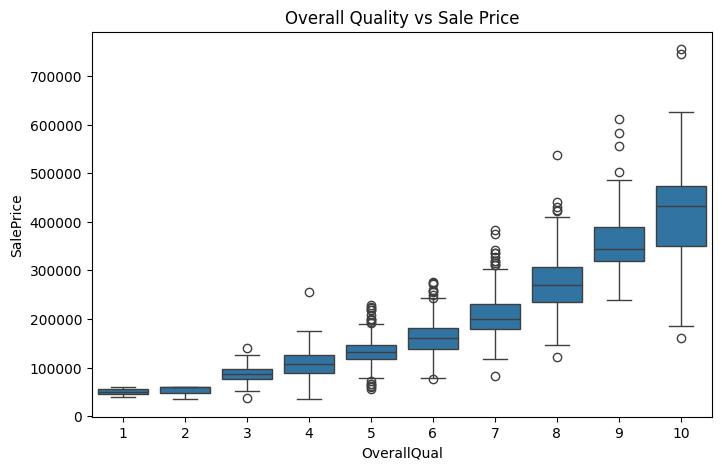


Missing values per column:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


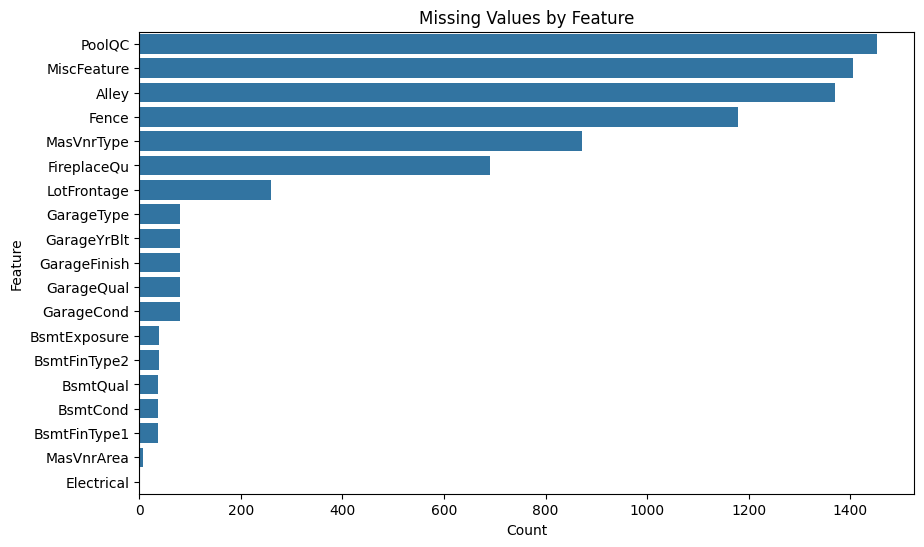

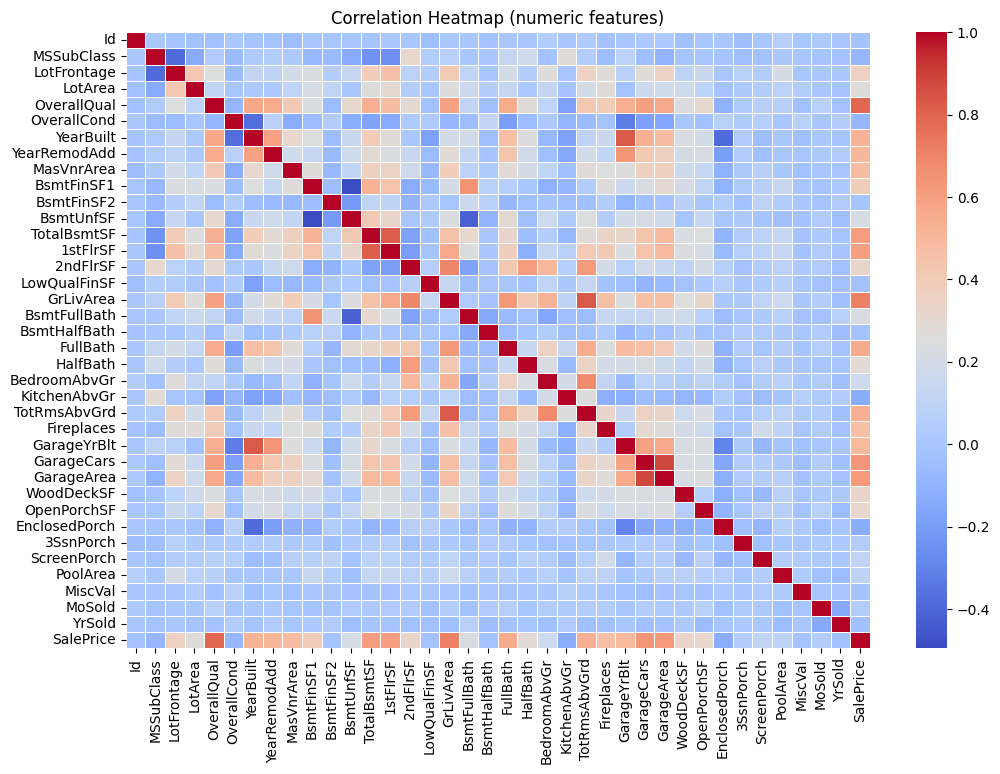


Top correlated features with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ======================
# 1) Load the dataset
# ======================
df = pd.read_csv("../data/train.csv")

# ======================
# 2) Basic overview
# ======================
print("Shape (rows, columns):", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:")
print(df.info())
print("\nDescribe:\n", df.describe())

# ======================
# 3) SalePrice distribution
# ======================
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

print("\nSalePrice stats:\n", df["SalePrice"].describe())

# ======================
# 4) Relationships between features and SalePrice
# ======================

# Living area vs SalePrice
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("Living Area vs Sale Price")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

# Overall quality vs SalePrice
plt.figure(figsize=(8,5))
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("Overall Quality vs Sale Price")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

# ======================
# 5) Missing values
# ======================
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nMissing values per column:\n", missing)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values by Feature")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()

# ======================
# 6) Correlation Heatmap
# ======================
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

# Top features most correlated with SalePrice
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(10)
print("\nTop correlated features with SalePrice:\n", top_corr)
